In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import cauchy, norm
from collections import defaultdict

#ДЗ

In [10]:
# Функции распределений с прошлого занятия
# Равномерное распределение
def create_uniform_sequence(seq_len, min_val = 0, max_val = 1):
    result_sequence = [random.uniform(min_val, max_val) for _ in range(seq_len)]
    return result_sequence

# Сумма равномерно распределённых чисел
def create_sum_uniform_sequence(seq_len, min_val, max_val, num_sum):
    result_sequence = [sum(random.uniform(min_val, max_val) for _ in range(num_sum)) for _ in range(seq_len)]
    return result_sequence

# Нормальное распределение
def create_normal_sequence(seq_len, avg=0, std_dev=1):
    # Генерация последовательности с нормальным распределением с параметрами avg и std_dev
    result_sequence = [random.gauss(avg, std_dev) for _ in range(seq_len)]
    return result_sequence

# Распределение Коши
def create_cauchy_sequence(seq_len, loc=0, scale_factor=1):
    # Генерация последовательности с распределением Коши, с параметрами loc и scale_factor
    result_sequence = cauchy.rvs(loc=loc, scale=scale_factor, size=seq_len)
    return result_sequence

# Генерация выборки для различных распределений
def generate_sequence(size, dist_type='normal', dist_params=None):
    if dist_type == 'normal':
        return np.random.normal(dist_params['mean'], dist_params['std'], size)
    elif dist_type == 'uniform':
        return np.random.uniform(dist_params['low'], dist_params['high'], size)
    elif dist_type == 'sum_of_uniform':
        return create_sum_uniform_sequence(size, dist_params['low'], dist_params['high'], dist_params['count'])


In [11]:
def mad(data):
    return np.mean(np.abs(data - np.mean(data)))

def bootstrap_mad(data, num_bootstrap=1000):
    bootstraps = [mad(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_bootstrap)]
    lower = np.percentile(bootstraps, 2.5)
    upper = np.percentile(bootstraps, 97.5)

    return lower, upper

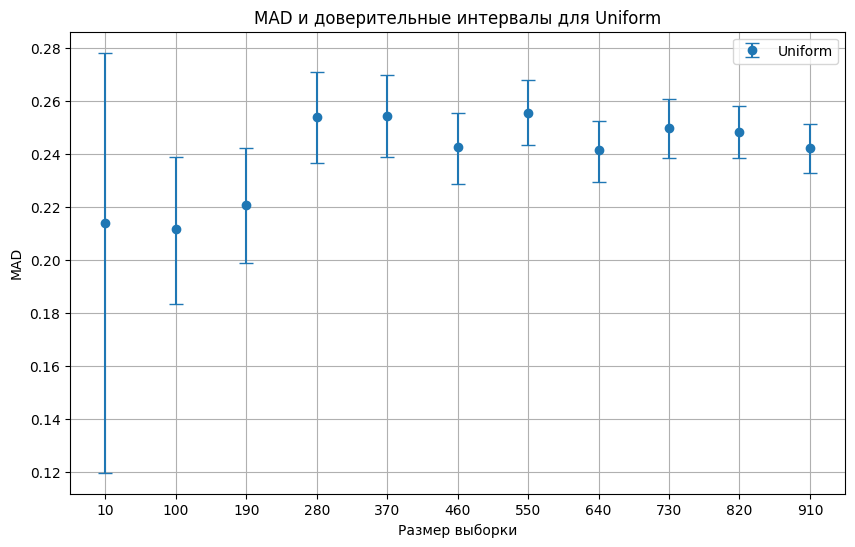

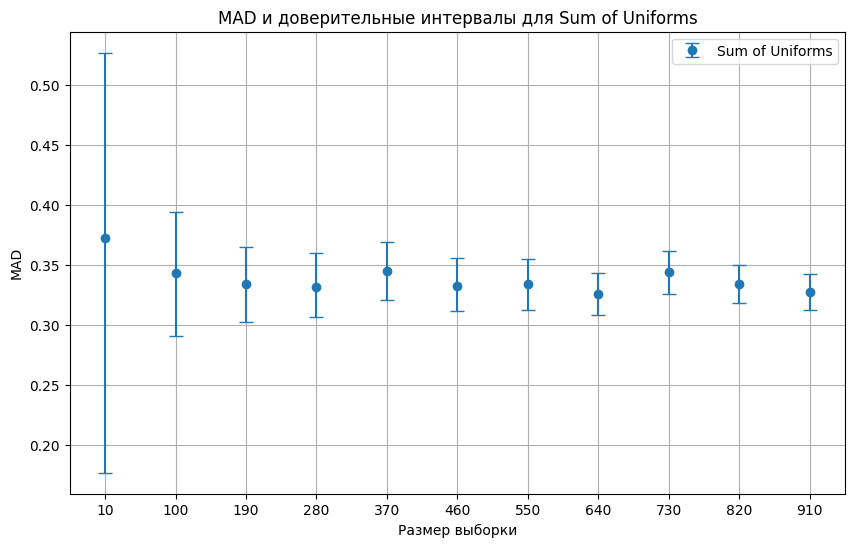

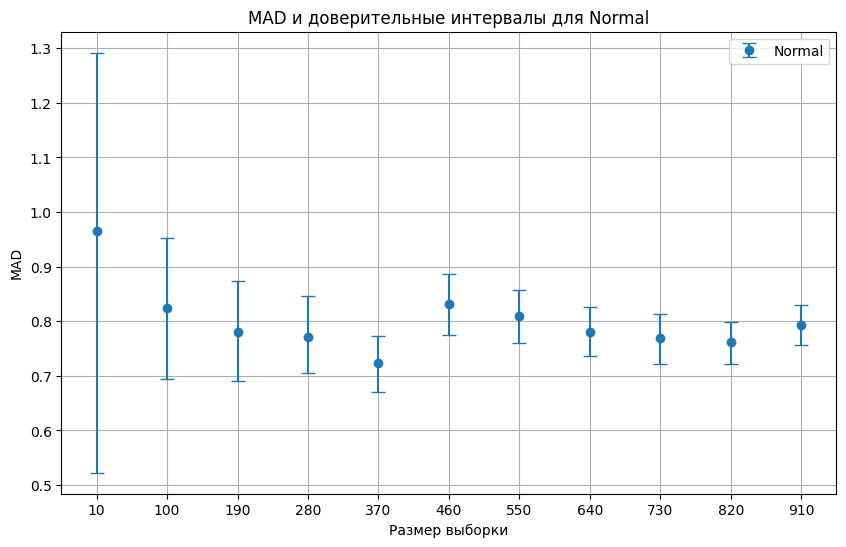

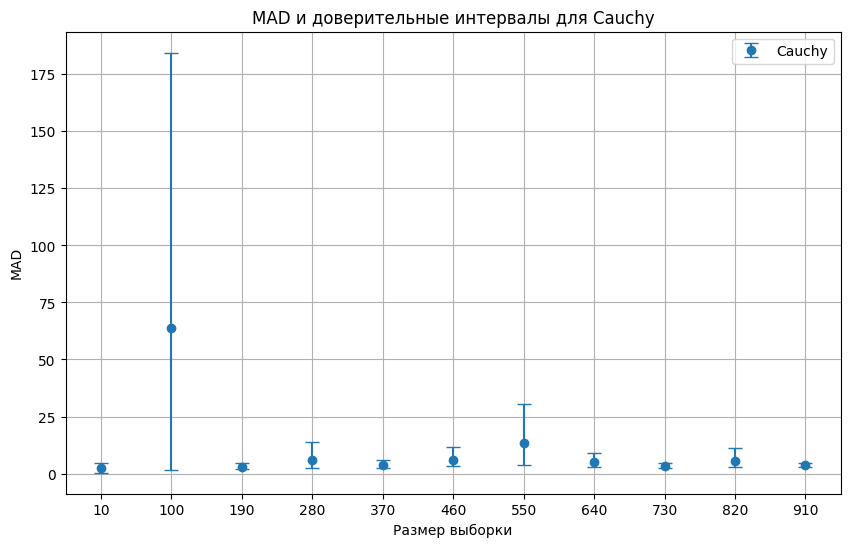

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для динамического создания размеров выборок
def generate_sample_sizes(start, stop, step):
    return list(range(start, stop, step))

# Динамически создаем размеры выборок
sample_sizes = generate_sample_sizes(10, 1000, 90)

distributions = {
    "Uniform": create_uniform_sequence,
    "Sum of Uniforms": create_sum_uniform_sequence,
    "Normal": create_normal_sequence,
    "Cauchy": create_cauchy_sequence
}

for distribution_name, generator in distributions.items():
    mad_values = []
    lower_bounds = []
    upper_bounds = []

    # Генерация статистики для каждого размера выборки
    for sample_size in sample_sizes:
        if distribution_name == "Sum of Uniforms":
            # Учитываем дополнительный аргумент при генерации
            sample_data = generator(sample_size, 0, 1, 2)
        else:
            sample_data = generator(sample_size)

        # Расчет медианы абсолютных отклонений и доверительных интервалов
        mad_value = mad(sample_data)
        lower_ci, upper_ci = bootstrap_mad(sample_data)

        # Сохранение значений MAD и доверительных интервалов
        mad_values.append(mad_value)
        lower_bounds.append(lower_ci)
        upper_bounds.append(upper_ci)

    # Визуализация MAD и доверительных интервалов для каждой распределения
    plt.figure(figsize=(10, 6))

    # Создание графика с ошибками для визуализации доверительных интервалов
    plt.errorbar(sample_sizes, mad_values,
                 yerr=[np.array(mad_values) - np.array(lower_bounds),
                       np.array(upper_bounds) - np.array(mad_values)],
                 fmt='o', label=distribution_name, capsize=5)

    plt.xticks(sample_sizes)
    plt.xlabel('Размер выборки')
    plt.ylabel('MAD')
    plt.title(f'MAD и доверительные интервалы для {distribution_name}')
    plt.legend()
    plt.grid()

# Отобразим все графики
plt.show()